# Summary

Classification of iris dataset using different methods. 

# Import general requirements

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd

# Load data

The *iris* data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. This is an exceedingly simple domain. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

In [ ]:
# Load 
iris = datasets.load_iris()
# iris.keys()

# Description
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
feature_names = iris['feature_names']
X = iris["data"] # sepal length, sepal width, petal length, petal width
var_select = (2,3) # Two variables for display (petal length, petal width)
X_petal = X[:,var_select] 
y = iris["target"]
target_names = iris["target_names"]

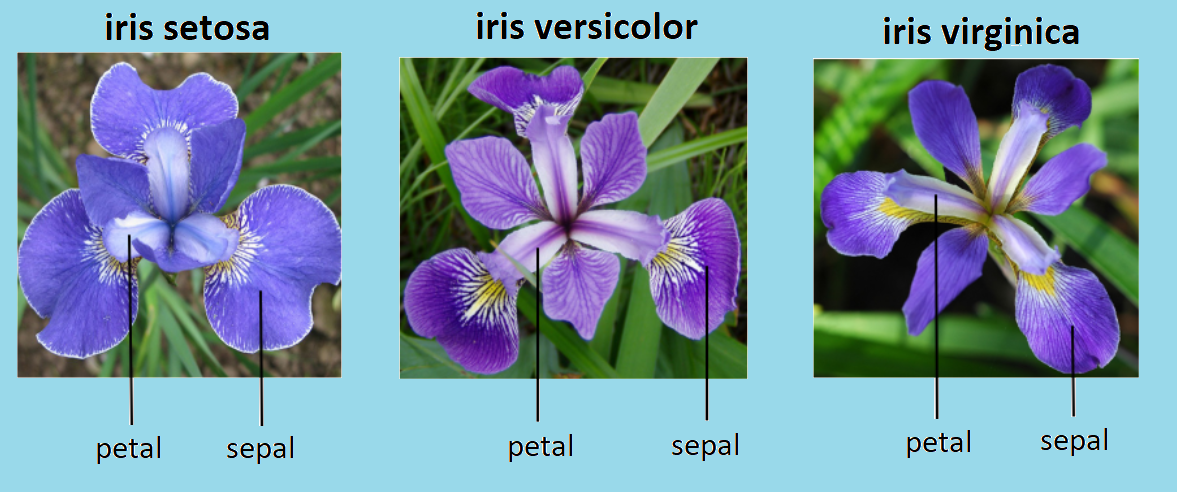

# Data visualization

Display data as data frame:

In [ ]:
X_df = pd.DataFrame(X, columns=feature_names)
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Main statistics:

In [ ]:
X_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Matrix scatter plot of the four variables using color coding of the class variable.

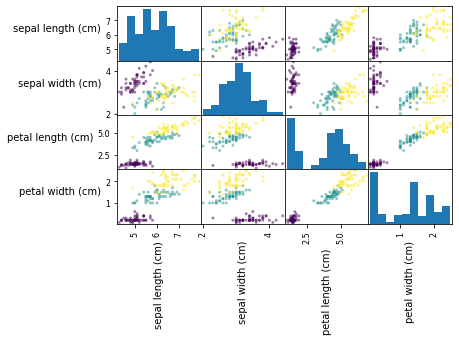

In [ ]:
axes = pd.plotting.scatter_matrix(X_df, c=y)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

There are strong linear relationships between petal lenght and petal width and between petal length and sepal length. Setosa is linearly separable from the other two clases.

Scatter plot between petal lenght and petal width:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  This is separate from the ipykernel package so we can avoid doing imports until


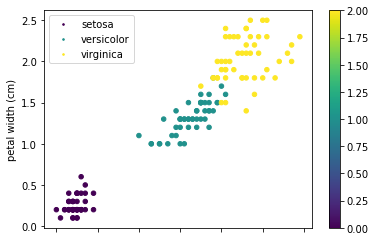

In [ ]:
X_df.plot.scatter(x=feature_names[2], y=feature_names[3], c=y, colormap='viridis')
handles = [plt.plot([], [], color=plt.cm.viridis(i/2.), ls="", marker=".", markersize=np.sqrt(10))[0] for i in range(3)]
plt.legend(handles, labels=target_names)

Visualization function to display classification results by dividing the input space into a collection of regions.

In [ ]:
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


In [ ]:
def plot_mesh_scatter(xx, yy, Z, name, feature_names, score):
    fig=plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also training and testing
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.text(0.9, 0.1, '{:.2f}'.format(score),size=15,
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()
    return fig

# Data processing

## Split data

Split data into training and test sets. The *stratify* parameter preserves the proportion of target as in original dataset.

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=42, stratify=y)

X_petal_train, X_petal_test, y_petal_train, y_petal_test = train_test_split(
     X_petal, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
step_mesh = 0.01    # step size in mesh

# Min, max from all training set
x_min, x_max = X_petal[:, 0].min() - 1, X_petal[:, 0].max() + 1
y_min, y_max = X_petal[:, 1].min() - 1, X_petal[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step_mesh),
                     np.arange(y_min, y_max, step_mesh))

## Data scaling

Standardize features by whitening data (zero mean and unit variance domain). 

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # used later
# X_train_scaled = scaler.fit_transform(X_train)
# pd.DataFrame(X_train_scaled).describe()

# Define classifiers

Logistic (sofmax) regression for the multiclass case uses cross-entropy for *multi_class*=‘multinomial’. Regularization is applied by default and is controlled with the parameter *C*, where smaller values specify stronger regularization (as in SVM).

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic (softmax) regression model
log_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1)
log_reg_petal = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=1)

# Predict for a given value probability or class
#log_reg.predict_proba([[5, 2, 1.5, 0.2]])
#log_reg.predict([[5, 2, 1.5, 0.2]])


# K-nearest neighbours (K-NN) for $K=1$ and $K=3$.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = Pipeline([("scaler", StandardScaler()), 
                    ("knn", KNeighborsClassifier(n_neighbors=1))])
knn_3 = Pipeline([("scaler", StandardScaler()), 
                    ("knn", KNeighborsClassifier(n_neighbors=3))])

Support vector machine (SVM) for linear SVC, linear SVC with polynomial features and SVC with polynomial and Gaussian kernels. The parameter *C* is inversely proportional to the regularization parameter. The parameter *coef0* represents the independent term in kernel function for polynomial kernel.  

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

svm_lin = Pipeline([("scaler", StandardScaler()), 
                    ("linear_svc", LinearSVC(C=5, loss="hinge"))])
svm_poly3 = Pipeline([("poly_features", PolynomialFeatures(degree=3)), 
                   ("scaler", StandardScaler()), 
                    ("svm_clf", LinearSVC(C=1, loss="hinge"))])
svm_poly = Pipeline([("scaler", StandardScaler()),
                         ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=1))])
svm_rbf = Pipeline([("scaler", StandardScaler()), 
                         ("svm_clf", SVC(kernel="rbf", gamma=5, C=1))]) #gamma: exp decay

In [ ]:
#clf = [svm_poly]; clf_name = ['svm_poly'];
#score=train_assess_classifiers(clf,clf_name)
#print(score)

Decision tree and random forest, which fits a number of decision tree classifiers (100 by default) on various sub-samples of the data set and predicts by voting. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(max_depth=3)

Select the classifiers that will be used in the comparison. 

Ensemble methods use different algorithms to improve the predicitve performance obtained by the individual algorithms. 

A "voting classifier" trains on an ensemble of models and aggregates the findings by majority of voting. In *hard voting*, the predicted output is the class with majority vote. In *soft voting*, the predicted class os obtained by combining the probabilities of all classifiers (argmax of the sums of the predicted probabilities).

In [ ]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('log', log_reg), ('svm', svm_rbf), ('rnd', rnd_clf)],
    voting='hard')

In [ ]:
#clf = [voting_clf]; clf_name = ['AdaBoost'];
#score=train_assess_classifiers(clf,clf_name)
#print(score)

Adaptive Boosting (AdaBoost) is an adaptive algorithm that combines copies of weak classifiers and iteratively adjusts the weights of the incorrectly classified instances. 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5
    )

Train and evaluate all classifiers. 

In [ ]:
classifiers = [log_reg, knn_1, knn_3, 
               svm_lin, svm_poly3, svm_poly, svm_rbf, 
               tree_clf, rnd_clf, 
               voting_clf, ada_clf]
               
clf_names = ['Logistic regression', '1-NN', '3-NN', 
             'Lin SVC', 'Lin SVC with polynomial features', 'SVC kernel=poly', 'SVC kernel=rbf', 
             'Decision tree', 'Random forest',  
             'voting (log reg, SVM (rbf), Rnd)', 'AdaBoost']

In [ ]:
# Loop across classifiers
def train_assess_classifiers(classifiers,clf_names):
  num_clf = len(classifiers)
  scores = []
  fig = plt.figure(figsize=(12,12))
  for i, (clf, clf_name) in enumerate(zip(classifiers, clf_names)): 
    # Train and score with all variables
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

    # Plot decision boundary for two variables only (X_petal)
    clf.fit(X_petal_train, y_petal_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.subplot(4,3,i+1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=.8)

    # Plot also training and testing
    plt.scatter(X_petal_test[:,0], X_petal_test[:,1], c=y_petal_test)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(clf_name)
    plt.text(0.9, 0.1, '{:.2f}'.format(score),size=15,
              ha='center', va='center', transform=plt.gca().transAxes)
    #plt.legend(labels=target_names)
  return scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.p

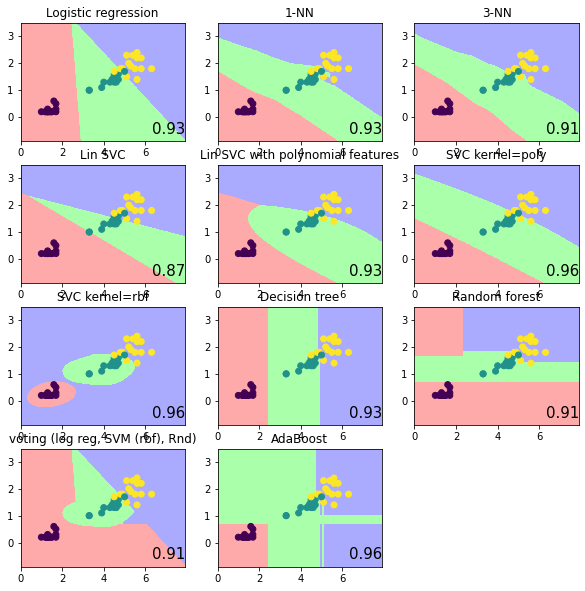

In [ ]:
scores = train_assess_classifiers(classifiers,clf_names)

SVC and AdaBoost yield highest scores. SVC with polynomial kernel leads to what seems more robust boundaries. Logistic regresion leads to higher scores than linear SVC. Among ensemble methods, AdaBoost ouperforms hard voting classifier. 

<BarContainer object of 11 artists>

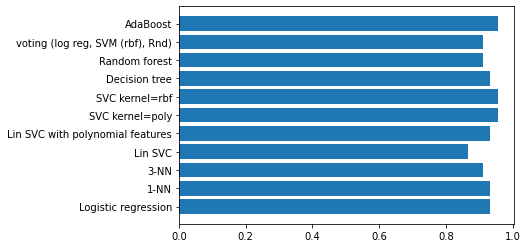

In [ ]:
plt.barh(clf_names, scores)